# Tensor Flow to encode LFW set
To learn how to encode a simple image and a GIF

## Import needed for Tensorflow

In [1]:
import numpy as np
import tensorflow as tf

## Import needed for Jupiter:

In [2]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import Image

In [3]:
size = 10

tf.reset_default_graph()

all_faces = tf.Variable(0,validate_shape=False, dtype=tf.float32, name='all_faces')
saver = tf.train.Saver()
sess =  tf.Session()

In [4]:
with sess.as_default():
    tf.initialize_all_variables().run()
    for var in tf.all_variables():
        print (var.name, var.eval().shape)
    print all_faces.eval()

(u'all_faces:0', ())
0.0


In [5]:
with sess.as_default():
    ckpt = tf.train.get_checkpoint_state("./tmp/")
    if ckpt and ckpt.model_checkpoint_path:
        print ckpt.model_checkpoint_path
        saver.restore(sess, ckpt.model_checkpoint_path)
        print("Model restored.")
    else:
        print ("Model not restored.")

./tmp/model.ckpt
Model restored.


In [6]:
with sess.as_default():
    for var in tf.all_variables():
        print (var.name, var.eval().shape)
    print all_faces.eval()

(u'all_faces:0', (10, 250, 250))
[[[ 0.14536607  0.15289439  0.14419065 ...,  0.92481071  0.95753837
    0.95830441]
  [ 0.14536607  0.15289439  0.14419065 ...,  0.90830153  0.95753837
    0.95830441]
  [ 0.14536607  0.15289439  0.14419065 ...,  0.89179236  0.94102919
    0.94179523]
  ..., 
  [ 0.44253123  0.45005956  0.44135582 ...,  1.15593922  1.17215765
    1.17292368]
  [ 0.47554958  0.46656874  0.457865   ...,  1.15593922  1.17215765
    1.17292368]
  [ 0.47554958  0.46656874  0.47437418 ...,  1.15593922  1.17215765
    1.17292368]]

 [[ 0.73969638  0.74722475  0.75503016 ...,  1.18895757  1.205176
    1.20594203]
  [ 0.73969638  0.74722475  0.75503016 ...,  1.18895757  1.205176
    1.20594203]
  [ 0.73969638  0.74722475  0.75503016 ...,  1.1724484   1.18866682
    1.18943286]
  ..., 
  [ 0.3930037   0.35100451  0.24324571 ..., -2.11287761 -2.12967753
   -2.14542055]
  [ 0.37649453  0.11987605  0.21022736 ..., -2.2119329  -2.22873259
   -2.3105123 ]
  [ 0.35998535  0.10336687  0

## A function to save a picture

In [7]:
#need to be called within a session
def write_png(tensor, name):
    casted_to_uint8 = tf.cast(tensor, tf.uint8)
    converted_to_png = tf.image.encode_png(casted_to_uint8)
    f = open(name, "wb+")
    f.write(converted_to_png.eval())
    f.close() 

## Create a test pictures
### Encode the input (a number)
This example convert the number to a binary representation

In [8]:
# Init size
with sess.as_default():
    a_face = tf.gather(all_faces,[0])
    print a_face.eval().shape
    # remove channel dimension and add index dimension
    pict_face = tf.expand_dims(tf.squeeze(a_face, squeeze_dims=[0]),2)
    print pict_face.eval().shape
    write_png(pict_face, 'a_face.png')


(1, 250, 250)
(250, 250, 1)


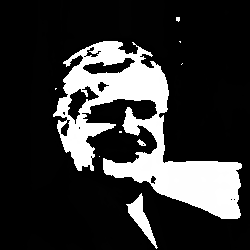

In [9]:
Image("a_face.png")

Feedback wellcome @dh7net